In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# Introduction to Engineering Dynamics
## Newtonian Mechanics

There are three laws that define _Newtonian Mechanics_: 
1. An object at rest will stay at rest and an object in motion will remain in motion unless acted upon by an external force $\sum\mathbf{F}=\mathbf{0}$ and $\sum\mathbf{M} = \mathbf{0}$
2. The change in momentum of a body is proportional to the force applied, $\sum \mathbf{F} = \frac{d}{dt}\left(m\mathbf{v}\right)$ and $\sum\mathbf{M} = \frac{d}{dt}\left(\mathbf{h}\right)$
3. For every applied force, there is an equal and opposite reaction force



In [2]:
import sympy

In [37]:

sympy.var('m, g, P_x, P_y, R_y, W_P, L, x')

Fx = P_x
Fy = P_y + R_y - W_P - m*g
Mz = -L/2*m*g + L*R_y - x*W_P

eqns = sympy.Matrix([Fx, Fy, Mz])
A = sympy.solve((eqns[0], eqns[1], eqns[2]), (P_x, P_y, R_y))
Py_function = sympy.lambdify((x, L, W_P, m, g), A[P_y], 'numpy')
Ry_function = sympy.lambdify((x, L, W_P, m, g), A[R_y], 'numpy')

## Bridge example: live load no acceleration

![person walking across a bridge](./images/bridge.svg)

Consider a 50-kg person travelling from the left-to-right edges of the bridge at a constant velocity. The acceleration of the person is 0 and the bridge has 0 acceleration.  

- $v_{person} = 10~\frac{m}{s}$
- $x_{person} = \int_0^tv_{person}dt = 10t~m$

The first law defines the study of static structures and objects that are moving slowly or have negligible momentum, $m\mathbf{v}$. In order to keep the bridge from moving, the total applied force $\mathbf{F}$ and moments $\mathbf{M}$ must be equal to $\mathbf{0}$. 

$\left[\begin{matrix}
\sum F_x\\
\sum F_y\\
\sum M_z
\end{matrix}\right] =
\left[\begin{matrix}
P_{x}\\
P_{y} + R_{y} - W_{P} - g m\\
L R_{y} - \frac{L g m}{2} - W_{P} x
\end{matrix}\right] =
\left[\begin{matrix}
0\\ 0\\ 0\\
\end{matrix}\right]$

> __Note__: If you set up the equations by separating the unknown variables, $[P_x,~P_y,~R_y]$, from the known variables, you can set up a _linear algebra_ problem. For more information, check out the excellent video series [3Blue 1Brown - Essence of Linear Algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

>$\left[\begin{matrix}
~1 & 0 & 0\\
0 & 1 & 1 \\
0 & 0 &L
\end{matrix}\right]
\left[\begin{array}
~P_x\\
P_y\\
R_y\end{array}\right]=
\left[\begin{matrix}
0\\ W_{P} + mg \\ \frac{mgL}{2}+W_Px\\
\end{matrix}\right]$



Solving for the reaction forces, you have three equations, 

1. $P_x = 0$
2. $P_y = W_P +mg - \frac{mg}{2}-W_P\frac{x}{L}$
3. $R_y = \frac{mg}{2}+W_P\frac{x}{L}$

Text(0, 0.5, 'reaction force (N)')

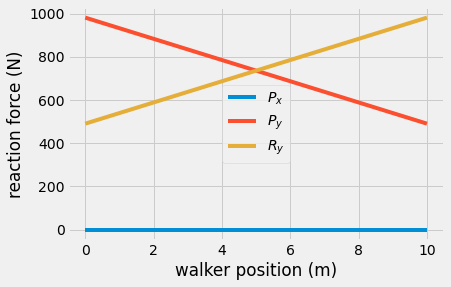

In [58]:
g = 9.81
L = 10
m = 100
Wp = 50*g

Px = lambda x: 0*x
Py = lambda x: Wp + m*g/2 - Wp*x/L
Ry = lambda x: m*g/2 +Wp*x/L

t = np.linspace(0, 1)
v = 10
x = v*t


plt.plot(x, Px(x), label = r'$P_x$')
plt.plot(x, Py(x), label = r'$P_y$')
plt.plot(x, Ry(x), label = r'$R_y$')
plt.legend()
plt.xlabel('walker position (m)')
plt.ylabel('reaction force (N)')


Here you can see the reaction forces at each end of the bridge as a function of the person moving from left, $x=0~m$ to right, $x=10~m$. The reaction force increases as the walker moves away from the support. 

You can watch the reaction forces change in the animation below. 

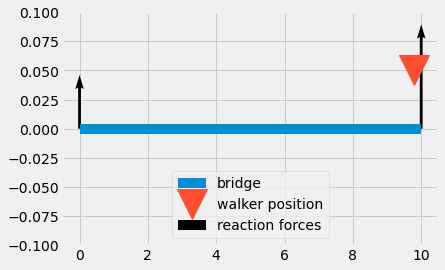

In [101]:
from matplotlib import animation
from IPython.display import HTML
fig, ax = plt.subplots(1,1);
ax.plot(x, x*0, '-', linewidth = 10, label = 'bridge')
Q = ax.quiver([0, 10], 
           [0, 0], 
           [0, 0],
           [Py(x[1]), Ry(x[1])], 
          scale = 3500, label = 'reaction forces')
mark, = ax.plot(x[1], 0.01, 'v', markersize = 30, label = 'walker position')

ax.legend(loc = 'lower center')
ax.set_xlim(-0.5, 10.5)
ax.set_ylim(-0.1, 0.1)

def animate(i):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """
    Q.set_UVC(np.array([0,  0]), 
              np.array([Py(x[i]), Ry(x[i])]))

    mark.set_data(x[i], 0.05)

    return Q, mark

# you need to set blit=False, or the first set of arrows never gets
# cleared on subsequent frames
anim = animation.FuncAnimation(fig, animate,
                               frames = range(len(t)-1), blit=False)
HTML(anim.to_html5_video())

## An example with $a\neq 0$



## Acceleration of a falling ball $a\neq 0$

In the previous bridge example, the person and bridge had 0 acceleration. Consider an falling object. Suppose you want to use video capture of a falling ball to _compute_ the acceleration of gravity. 

Watch the video of the ball falling. 

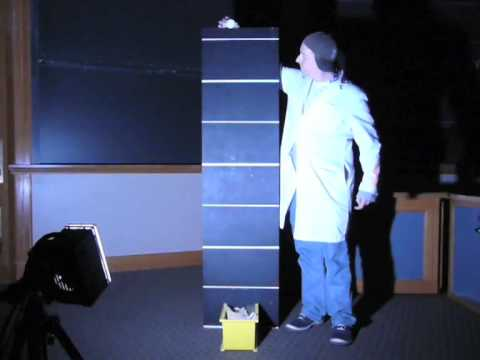

In [147]:
from IPython.display import YouTubeVideo
vid = YouTubeVideo("xQ4znShlK5A")
display(vid)

We learn from the video that the marks on the panel are every $0.25\rm{m}$, and on the [website](http://techtv.mit.edu/collections/physicsdemos/videos/831-strobe-of-a-falling-ball) they say that the strobe light flashes at about 15 Hz (that's 15 times per second). The final [image on Flickr](https://www.flickr.com/photos/physicsdemos/3174207211) notes that the strobe fired 16.8 times per second. 

The ball is freefalling, so the acceleration is constant, $a = g = 9.81~\frac{m}{s^2}$. Its not moving left or right, so you can describe its position and velocity as

- $x(t) = x_0$
- $y(t) = y_0 + \dot{y}_0t +\frac{g}{2}t^2$

where the initial position is $(x_0,~y_0)$,  the initial velocity is $(0,~\dot{y}_0)$, and $t$ is elapsed time. Take a look at the final frame of the compiled positions below.

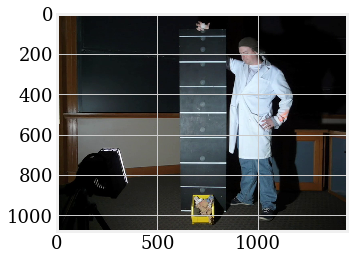

In [155]:
reader = imageio.get_reader('https://go.gwu.edu/engcomp3vidmit', format='mp4')
image = reader.get_data(1100)

plt.imshow(image, interpolation='nearest');

The first position after releasing the ball, is just below the first white line at 125 pixels. The average distance between markers is 495 pixels/meter, so the camera would measure an acceleration 

$g = 9.81~\frac{m}{s^2}\cdot\frac{495~pixels}{1~meter}=4850~\frac{pixels}{s^2}$. 

With a little guess-and-check, the initial velocity just below the first white marker is $\dot{y}_0=800~\frac{pixels}{s}$. The position on the image is then, 

$y(t) = 125 + 800 t + \frac{4850}{2}t^2~pixels$. 

The frames are plotted on top of the image below. 

[494.28571429] px/m


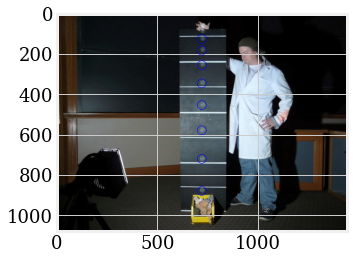

In [156]:
x0 = 720
y0 = 125
bars = np.array([115, 980])
scale = np.diff(bars)/1.75
print(scale, 'px/m')

g = 9.81*scale # m/s^2*d*0.25 px/m = px/s^2


t = np.arange(0, 8, 1)*1/16.8
x = np.ones(len(t))*x0
y = y0 + 800*t + g*t**2/2
plt.clf()
plt.imshow(image)
plt.scatter(x, y, s = 80, facecolor='none', edgecolors='b')

## Wrapping up

In this notebook, you looked at two situations

1. forces and motion when acceleration is 0
2. motion when acceleration is $a\neq0$

Next, you will define properties of kinetics (forces, energy, and impulse) and kinematics (motion described by position, velocity, acceleration). 